# Get weather data

In [8]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Open-Meteo API client setup
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Select zurich weather data in the timeframe of our participants 
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 47.3667,
	"longitude": 8.55,
	"start_date": "2021-01-08",
	"end_date": "2021-11-30",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "cloud_cover", "wind_speed_10m"],
	"daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "wind_speed_10m_max"],
	"timezone": "Europe/Berlin"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location (ignore additional locations / models that have been fetched)
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(3).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(5).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe


Coordinates 47.34621810913086°N 8.54337215423584°E
Elevation 442.0 m asl
Timezone b'Europe/Berlin' b'CEST'
Timezone difference to GMT+0 7200 s


,date,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m
0,2021-01-07 22:00:00+00:00,-3.5225,98.148712,0.0,961.706482,89.099998,5.154416
1,2021-01-07 23:00:00+00:00,-3.1225,98.154823,0.0,961.879944,90.000000,4.452954
2,2021-01-08 00:00:00+00:00,-2.4725,98.895203,0.0,962.102417,84.000000,7.491114
3,2021-01-08 01:00:00+00:00,-0.9225,98.187912,0.0,962.404907,52.500000,4.843305
4,2021-01-08 02:00:00+00:00,-1.8225,98.537201,0.0,962.418945,38.699997,4.610250
...,...,...,...,...,...,...,...
7843,2021-11-30 17:00:00+00:00,2.5775,77.715958,0.9,966.295410,100.000000,21.093050
7844,2021-11-30 18:00:00+00:00,2.6775,82.391701,0.8,966.219666,100.000000,18.472595
7845,2021-11-30 19:00:00+00:00,3.0275,85.159325,0.6,966.096558,100.000000,17.595861
7846,2021-11-30 20:00:00+00:00,3.3775,85.198357,0.6,965.973328,100.000000,17.873556


In [9]:
# Process daily data
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(3).ValuesAsNumpy()
daily_sunrise = daily.Variables(4).ValuesAsNumpy()
daily_sunset = daily.Variables(5).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(6).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(7).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(8).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(9).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["sunrise"] = daily_sunrise
daily_data["sunset"] = daily_sunset
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)
daily_dataframe

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,wind_speed_10m_max
0,2021-01-07 22:00:00+00:00,3.0,1.7775,-3.5225,-1.185000,0,0,31297.433594,25525.607422,0.000000,7.517021
1,2021-01-08 22:00:00+00:00,3.0,0.8275,-5.3225,-2.507917,0,0,31389.322266,19588.705078,0.000000,16.641972
2,2021-01-09 22:00:00+00:00,3.0,-0.7725,-4.3225,-2.645416,0,0,31486.535156,21132.386719,0.000000,15.379206
3,2021-01-10 22:00:00+00:00,3.0,-1.7225,-4.6725,-3.212083,0,0,31588.841797,24357.156250,0.000000,9.339208
4,2021-01-11 22:00:00+00:00,73.0,2.5275,-4.5225,-0.076667,0,0,31696.013672,0.000000,8.900001,22.366402
...,...,...,...,...,...,...,...,...,...,...,...
322,2021-11-25 22:00:00+00:00,73.0,1.7275,0.6275,1.052500,0,0,32071.185547,0.000000,4.100000,12.074766
323,2021-11-26 22:00:00+00:00,75.0,5.1775,-0.3725,1.829583,0,0,31954.289062,14053.246094,3.900000,12.240000
324,2021-11-27 22:00:00+00:00,73.0,3.4275,-0.4725,1.283750,0,0,31840.566406,24892.726562,2.700000,12.429127
325,2021-11-28 22:00:00+00:00,73.0,1.6775,-0.8225,0.321250,0,0,31730.181641,12957.811523,3.800000,13.854155


## Persist Data to CSV

In [5]:
hourly_dataframe.to_csv('zurich_weather_hourly.csv', index=False)

In [6]:
daily_dataframe.to_csv('zurich_weather_daily.csv', index=False)

# Plot weather data

## Hourly Weather Data

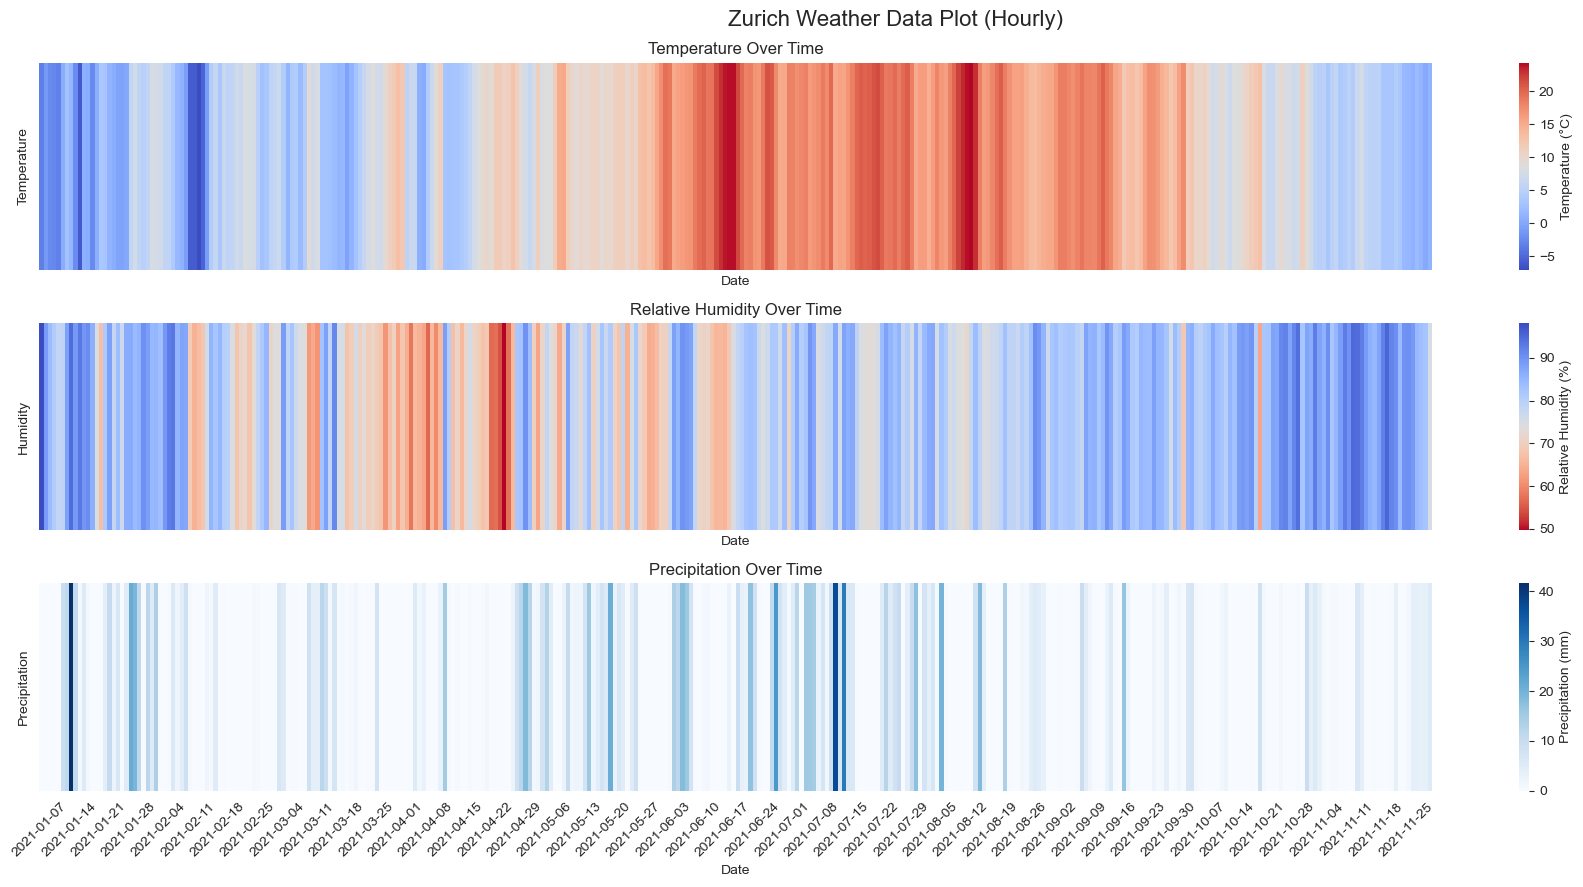

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
weather_df = pd.read_csv('zurich_weather_hourly.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Extract the day from the date
weather_df['day'] = weather_df['date'].dt.date

# Aggregate data to daily values
daily_weather = weather_df.groupby('day').agg({
    'temperature_2m': 'mean',
    'relative_humidity_2m': 'mean',
    'precipitation': 'sum',
    'surface_pressure': 'mean',
    'cloud_cover': 'mean',
    'wind_speed_10m': 'mean'
}).reset_index()

# Rename columns for better readability in the plot
daily_weather.rename(columns={
    'temperature_2m': 'Temperature',
    'relative_humidity_2m': 'Humidity',  # Assuming relative humidity as a proxy for sunlight
    'precipitation': 'Precipitation'
}, inplace=True)

# Set the date as the index for plotting
daily_weather.set_index('day', inplace=True)

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(daily_weather[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Temperature Over Time')

# Sunlight heatmap
sns.heatmap(daily_weather[['Humidity']].T, cmap='coolwarm_r', ax=axs[1], cbar_kws={'label': 'Relative Humidity (%)'})
axs[1].set_title('Relative Humidity Over Time')

# Precipitation heatmap
sns.heatmap(daily_weather[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Precipitation Over Time')

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(daily_weather.index), 7))
    ax.set_xticklabels(daily_weather.index[::7], rotation=45)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Daily Weather Data

/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_40309/2958244599.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={


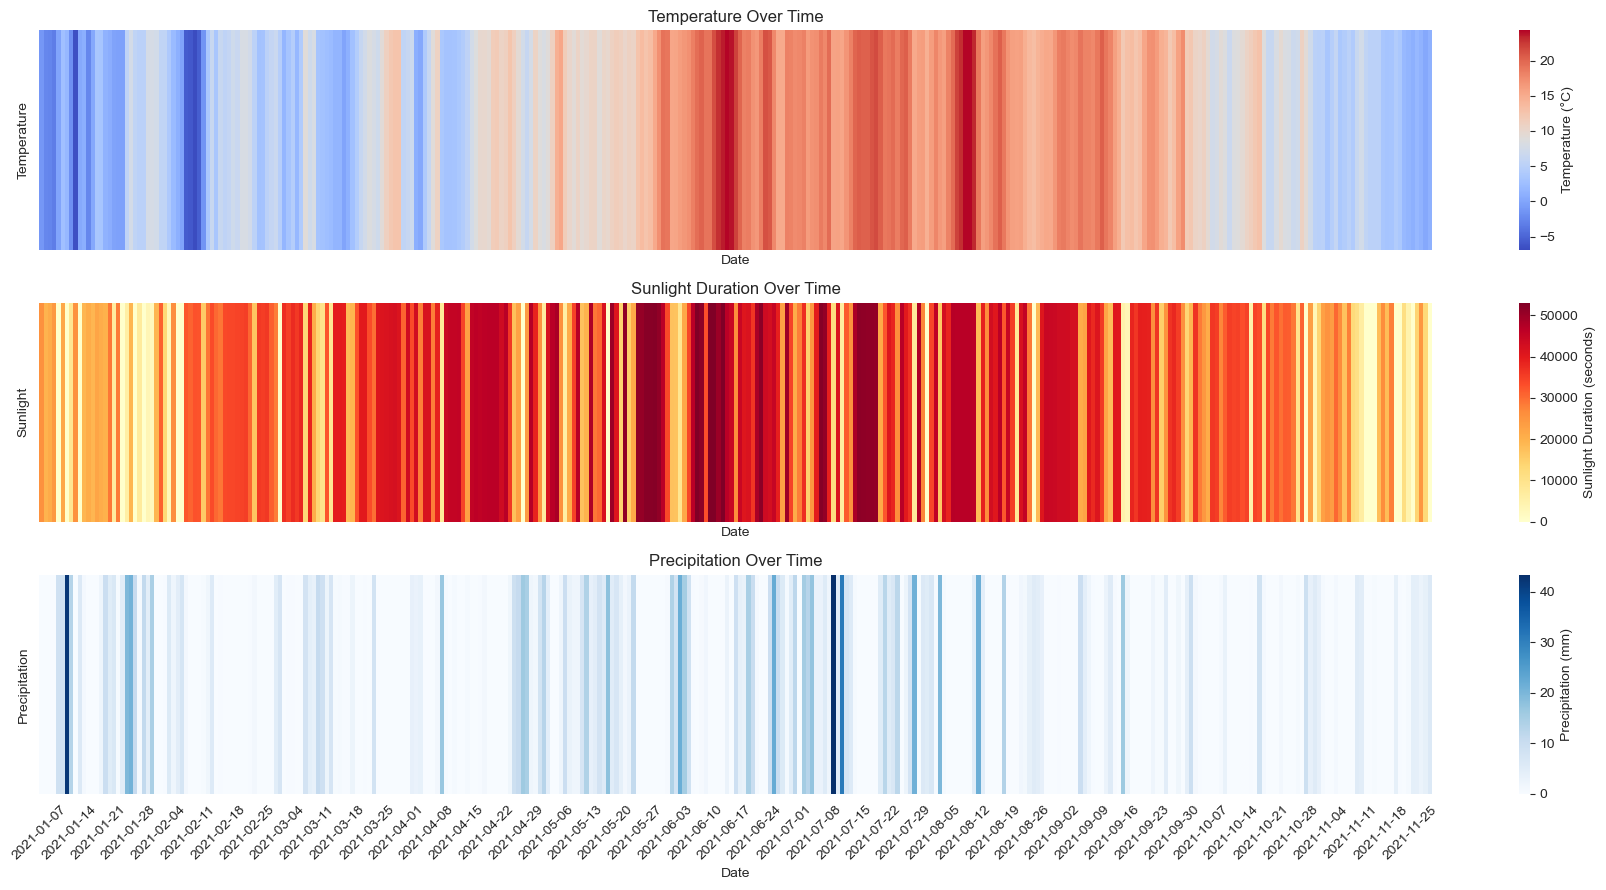

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for plotting
weather_df.set_index('date', inplace=True)

# Select only the required columns
plot_data = weather_df[['temperature_2m_mean', 'sunshine_duration', 'precipitation_sum']]

# Rename columns for better readability in the plot
plot_data.rename(columns={
    'temperature_2m_mean': 'Temperature',
    'sunshine_duration': 'Sunlight',
    'precipitation_sum': 'Precipitation'
}, inplace=True)

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(plot_data[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Temperature Over Time')

# Sunlight heatmap
sns.heatmap(plot_data[['Sunlight']].T, cmap='YlOrRd', ax=axs[1], cbar_kws={'label': 'Sunlight Duration (seconds)'})
axs[1].set_title('Sunlight Duration Over Time')

# Precipitation heatmap
sns.heatmap(plot_data[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Precipitation Over Time')

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(plot_data.index), 7))
    ax.set_xticklabels(plot_data.index[::7].strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()
